PS2: Marks 200. Epilepsy is a nervous system disorder that affects movement. The dataset contains 195 records of various people with 23 features which contain biomedical measurements. Your model will be used to differentiate healthy people from people having disease. Target Column is 'status'. Identify the model with best params. Data Link - https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/epilepsy.data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Epilepsy.csv')

In [3]:
#we have 23 features out of which the target column is status, this is a binary classification problem.
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
#we can see that all columns are int/float types except the name column and a few columns have 2-3 missing values, but that we can certainly clear up!
#lets try out some visualisations!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        194 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,193.000000,194.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003468,0.009932,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002765,0.008925,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001880,0.004982,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002700,0.007455,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003960,0.011558,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


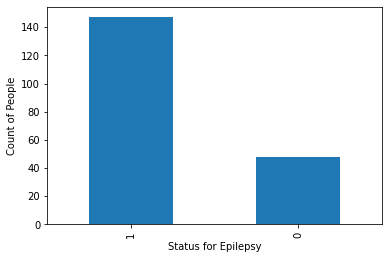

In [6]:
df['status'].value_counts().plot(kind = 'bar')
plt.xlabel('Status for Epilepsy')
plt.ylabel('Count of People')
plt.show()

In [7]:
#As we can see, this is clearly an imbalanced dataset! We'll have to see what kind of model works best here!

In [8]:
#lets dig into the name column a little bit!
name_col_full = df.iloc[:,0]

In [9]:
name_col = name_col_full.str.replace('phon_','')

In [10]:
#Lets divide the name values at the _ separator, maybe theres a hidden pattern in either the r section or s section, and 
#anyways we cannot use the name column as a feature, so maybe we'll get a usable feature out of it

In [11]:
name_df = pd.DataFrame({'name':name_col_full,'name_col':name_col, 'name_r':name_col.apply(lambda x: x[:3]), 'name_s':name_col.apply(lambda x: x[4:7])})

In [12]:
name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      195 non-null    object
 1   name_col  195 non-null    object
 2   name_r    195 non-null    object
 3   name_s    195 non-null    object
dtypes: object(4)
memory usage: 6.2+ KB


In [13]:
#lets see if there is some grouping in the r or s columns

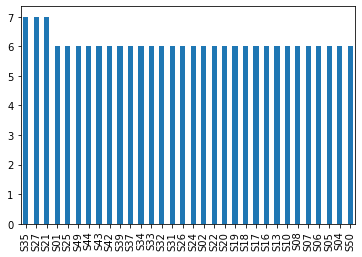

In [14]:
name_df['name_s'].value_counts().plot(kind = 'bar')
plt.show()

In [15]:
#well what do you know, there is definitely something this variable has to offer, but since we dont know 
#what it is for as we dont have the feature information available, we can use it as a feature to replace the name!

In [16]:
#lets see if the different s names have some relation with the target variable
name_df_merged = name_df.merge(df, on = 'name', how = 'left')

In [17]:
name_df_merged.head()

,name,name_col,name_r,name_s,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,R01_S01_1,R01,S01,119.992,157.302,74.997,0.00784,0.00007,0.00370,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,R01_S01_2,R01,S01,122.400,148.650,113.819,0.00968,0.00008,0.00465,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,R01_S01_3,R01,S01,116.682,131.111,111.555,0.01050,0.00009,0.00544,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,R01_S01_4,R01,S01,116.676,137.871,111.366,0.00997,0.00009,0.00502,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,R01_S01_5,R01,S01,116.014,141.781,110.655,0.01284,0.00011,0.00655,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


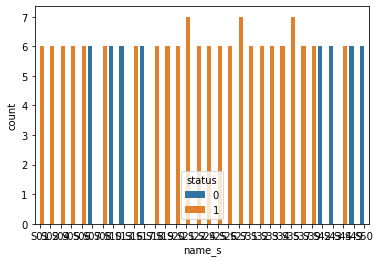

In [18]:
sns.countplot(data = name_df_merged, x = 'name_s',hue = 'status')
plt.show()

In [19]:
#as we can see, there definitely is some kind of relationship with the s_name and status of epilepsy
#some s_names have all patients with epilepsy and some have none!
#this feature could be interesting!
#now lets add this column to the main_dataset

In [20]:
df_main = df.merge(name_df, on = 'name')

In [21]:
df_main.drop(columns = ['name_col', 'name_r'], inplace = True, axis = 1)

In [22]:
#okay here we should split our data into training and test
from sklearn.model_selection import train_test_split

In [23]:
y = df_main['status']
X = df_main.drop('status', axis = 1)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [25]:
X_train.drop('name', axis = 1, inplace = True)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
X_test.drop('name', axis = 1, inplace = True)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


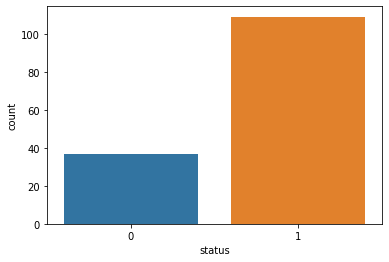

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


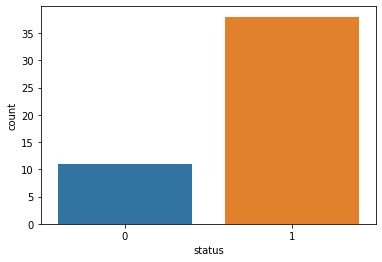

In [27]:
#lets just see if the classes have been split equally
sns.countplot(y_train)
plt.show()
sns.countplot(y_test)
plt.show()

# Okay lets work on making a pipeline! 

The steps involved will be:-
1. Taking care of missing values
2. Scaling the data
3. Converting the categorical values
4. Training a classifier and checking on the metrics


In [28]:
X_nums = list(X_train)
X_nums.remove('name_s')

In [49]:
X_cats = ['name_s']

In [30]:
#lets see the distributions of the different features, and accordingly we'll do scaling

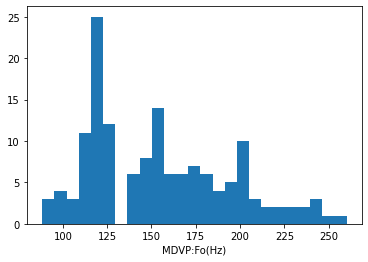

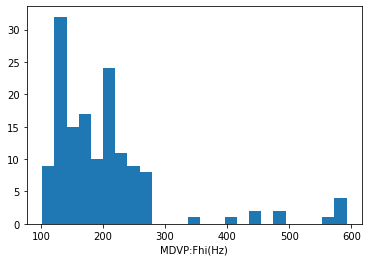

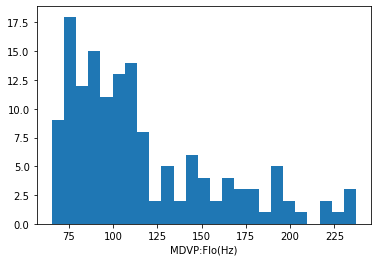

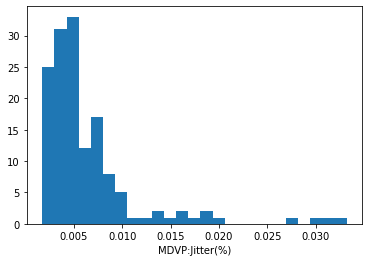

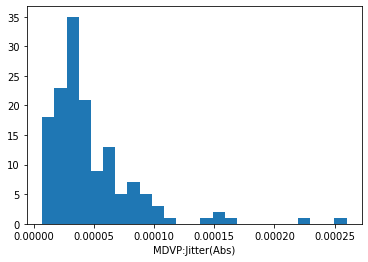

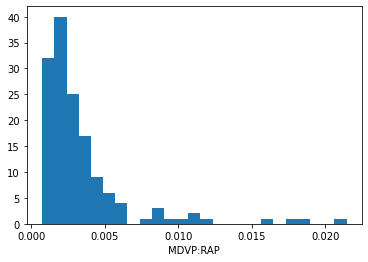

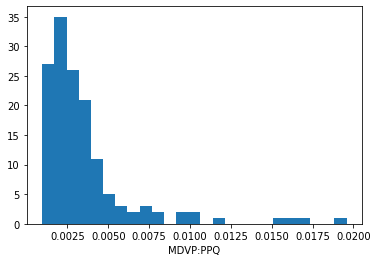

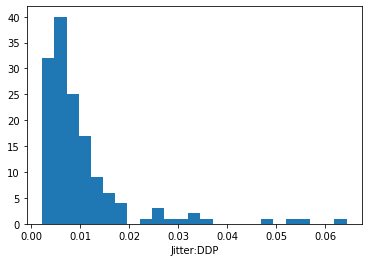

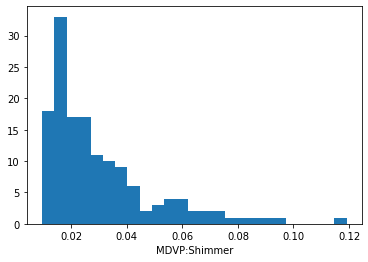

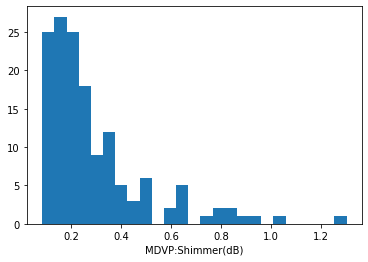

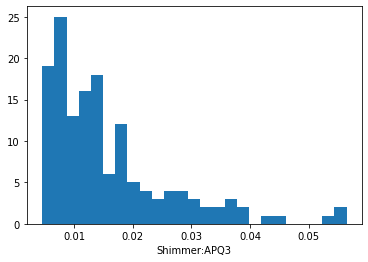

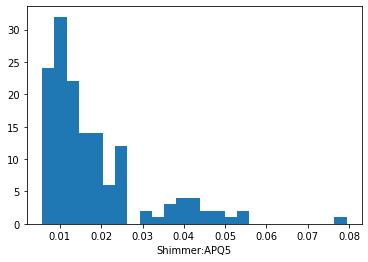

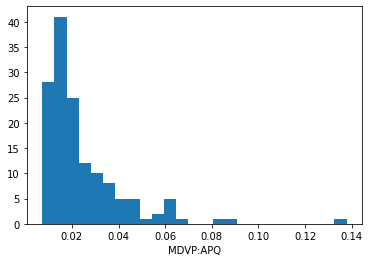

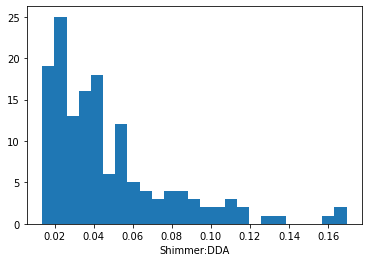

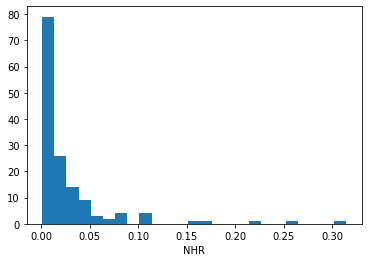

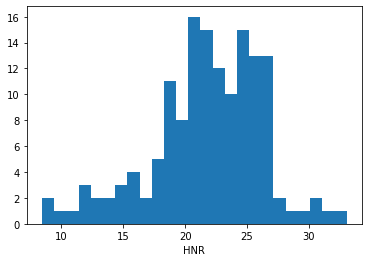

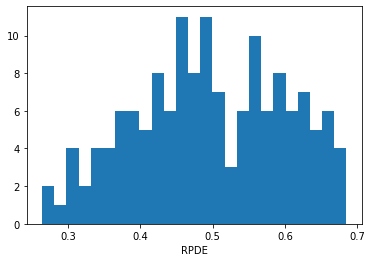

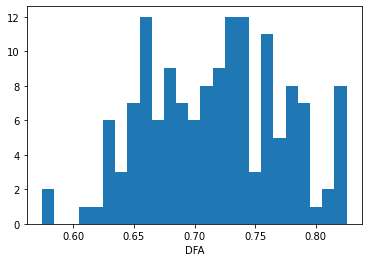

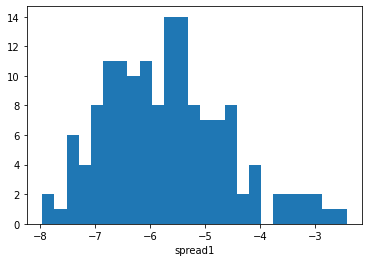

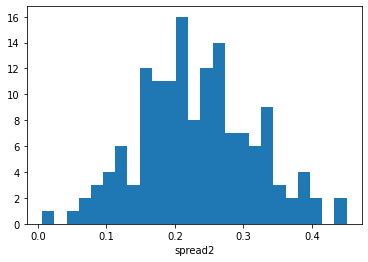

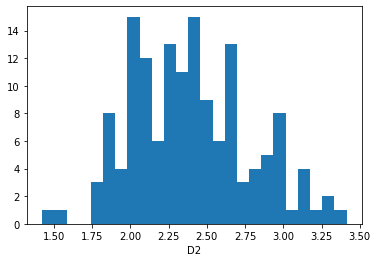

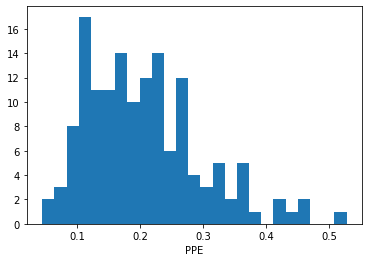

In [34]:
for i in X_nums:
    plt.hist(X_train[i], bins = 25)
    plt.xlabel(i)
    plt.show()

In [35]:
#Seems like a lot of the data is skewed, in this case, we can normalise the data or use standard scaler too

In [42]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [43]:
from sklearn.impute import SimpleImputer

In [45]:
scaler = StandardScaler()
imputer = SimpleImputer(strategy = 'median')
ohe = OneHotEncoder(drop = 'first')

In [46]:
from sklearn.pipeline import Pipeline

In [52]:
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy = 'median')),('scaler',StandardScaler())])
cat_pipeline = Pipeline([('encdoer', OneHotEncoder(drop = 'first'))])

In [54]:
from sklearn.compose import ColumnTransformer

In [55]:
full_pipeline = ColumnTransformer([('num', num_pipeline, X_nums), ('cat', cat_pipeline, X_cats)])

In [56]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [62]:
#Great! Our data is prepared now, lets try some basic models first and see which perform well!

In [63]:
#We need to consider what is the important metric, and since it is a medical case, hence recall will be the more important metric,
# as we need to make sure all the positive cases our predicted, even if sometimes, false positives are created

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lor_model = LogisticRegression()
lor_model.fit(X_train_prepared, y_train)

LogisticRegression()

In [75]:
#Lets see the accuracy score using cross_validation and different metrics
from sklearn.model_selection import cross_val_score
print('Accuracy:',cross_val_score(lor_model, X_train_prepared, y_train, cv = 3, scoring = 'accuracy'))
print('Recall:',cross_val_score(lor_model, X_train_prepared, y_train, cv = 3, scoring = 'recall'))
print('Precision:',cross_val_score(lor_model, X_train_prepared, y_train, cv = 3, scoring = 'precision'))

Accuracy: [0.89795918 0.89795918 0.89583333]
Recall: [0.97297297 1.         0.97222222]
Precision: [0.9        0.87804878 0.8974359 ]


It seems the Logistic Regression model is performing well in terms of accuracy,recall and Precision!
Let's try some other models as well!

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [79]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

In [80]:
#lets see the scores for the Decision Tree model
print('Accuracy:',cross_val_score(dt_model, X_train_prepared, y_train, cv = 3, scoring = 'accuracy'))
print('Recall:',cross_val_score(dt_model, X_train_prepared, y_train, cv = 3, scoring = 'recall'))
print('Precision:',cross_val_score(dt_model, X_train_prepared, y_train, cv = 3, scoring = 'precision'))

Accuracy: [0.93877551 0.89795918 0.77083333]
Recall: [1.         1.         0.86111111]
Precision: [0.925      0.87804878 0.91176471]


In [81]:
#Now for the random forest model
print('Accuracy:',cross_val_score(rf_model, X_train_prepared, y_train, cv = 3, scoring = 'accuracy'))
print('Recall:',cross_val_score(rf_model, X_train_prepared, y_train, cv = 3, scoring = 'recall'))
print('Precision:',cross_val_score(rf_model, X_train_prepared, y_train, cv = 3, scoring = 'precision'))

Accuracy: [0.87755102 0.87755102 0.85416667]
Recall: [0.94594595 1.         0.91666667]
Precision: [0.87804878 0.87804878 0.86842105]


In [82]:
#till now, logistic regression model is performing the best!
#now for knn model
print('Accuracy:',cross_val_score(knn_model, X_train_prepared, y_train, cv = 3, scoring = 'accuracy'))
print('Recall:',cross_val_score(knn_model, X_train_prepared, y_train, cv = 3, scoring = 'recall'))
print('Precision:',cross_val_score(knn_model, X_train_prepared, y_train, cv = 3, scoring = 'precision'))

Accuracy: [0.89795918 0.87755102 0.85416667]
Recall: [1.         0.97222222 0.94444444]
Precision: [0.88095238 0.875      0.87179487]


Lets go ahead with the logistic regression model and try it on the testing data! But before we do that, lets see which features were important for predictions!

In [89]:
(importance > 0)

array([[False, False, False, False, False,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
         True, False, False,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False,  True, False, False]])

In [90]:
#first prepare the test_data using full_pipeline
X_test_prepared = full_pipeline.transform(X_test)

In [93]:
final_predictions = lor_model.predict(X_test_prepared)

In [94]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [95]:
confusion_matrix(y_test, final_predictions)

array([[ 8,  3],
       [ 0, 38]], dtype=int64)

In [96]:
recall_score(y_test, final_predictions)

1.0

In [97]:
precision_score(y_test, final_predictions)

0.926829268292683

Seems like we've got a great model! Which is predicting recalling the positive classes very well, this is important as each actual positive case should be caught at the earliest! A precision of 92% indicates that a few false positives snuck in the predictions, but we have to consider the tradeoff!